# UNAD - Analisis de datos

Estudiante: Christian Daniel Ospina Valencia

Tarea 4 - Algoritmos de Aprendizaje no Supervisado


Grupo: 202016908_51

Tutor: Handry Orozco

Noviembre 10 de 2024

### Agrupamiento en K-means

### Pasos de la Actividad
1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.
2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario
3. Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características
4. Entrenar el modelo configurando los diferentes hiperparámetros
5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc
6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo.
7. Interpretar, analizar y documentar los resultados obtenido.s
8. Crear una cuenta en GitHub y cargar los códigos de los modelos diseñados https://github.com/

### 1. Realizar un análisis exploratorio de los datos para identificar relaciones entre variables, valores atípicos, tendencias, etc.

In [1]:
#Cargar las librerias necesarias

import pandas as pd # Manejo y análisis de estructuras de datos
import numpy as np # Cálculo numérico y el análisis de datos
import seaborn as sns # Creación gráficos estadísticos
import matplotlib.pyplot as plt # Creación de gráficos en dos dimensiones
import plotly.graph_objs as go # Creación de gráficos en tres dimensiones
import plotly.express as px # Creación de gráficos en tres dimensiones

# librerías de para implementar modelo Kmeans
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder

# librerías de para evaluar el modelo
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score

#Librería para evitar la advertencia de que el modelo de KMeans tiene una pérdida de memoria en Windows 
import warnings
warnings.filterwarnings('ignore')

In [2]:
# lectura de datos en Python y lo cargamos en la variable Datos

Datos = pd.read_csv('Mall_Customers.csv')

In [3]:
# Realizamos lectura de los Datos para el análisis exploratorio

Datos.head(40)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [4]:
# Descripción de los datos
Datos.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Text(0.5, 1.0, 'Identificación de Datos Faltantes y Atípicos')

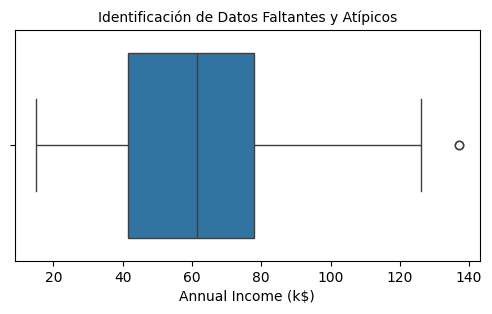

In [5]:
#Identificación de Datos Faltantes y Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Annual Income (k$)'])
plt.title('Identificación de Datos Faltantes y Atípicos', fontsize=10 )

### 2. Preprocesar los datos limpiándolos, tratando valores faltantes y transformándolos según sea necesario

In [6]:
#Revisión de datos faltantes

print("Cantidad de Registros con cero en Edad: ",Datos['Age'].isin([0]).sum())
print("Cantidad de Registros con cero en Renta anual: ",Datos['Annual Income (k$)'].isin([0]).sum())
print("Cantidad de Registros con cero en Data Puntuacion de gasto: ",Datos['Spending Score (1-100)'].isin([0]).sum())

Cantidad de Registros con cero en Edad:  0
Cantidad de Registros con cero en Renta anual:  0
Cantidad de Registros con cero en Data Puntuacion de gasto:  0


In [7]:
#Se convertiran los valores del Annual Income a miles, como lo indica su columna
Datos['Annual Income (k$)'] = Datos['Annual Income (k$)'] * 1000 
# Renombra la columna para reflejar los nuevos valores 
Datos.rename(columns={'Annual Income (k$)': 'Annual Income ($)'}, inplace=True)
Datos.head(10)

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100)
0,1,Male,19,15000,39
1,2,Male,21,15000,81
2,3,Female,20,16000,6
3,4,Female,23,16000,77
4,5,Female,31,17000,40
5,6,Female,22,17000,76
6,7,Female,35,18000,6
7,8,Female,23,18000,94
8,9,Male,64,19000,3
9,10,Female,30,19000,72


Text(0.5, 1.0, 'Identificación de Datos Atípicos')

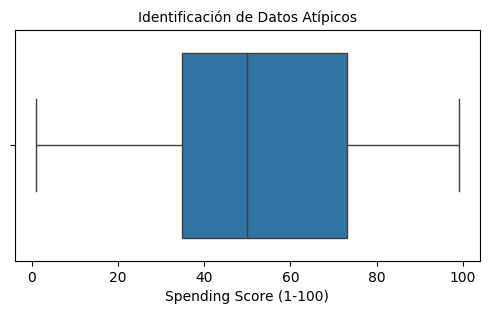

In [8]:
#Identificación de Datos Atípicos

plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['Spending Score (1-100)'])
plt.title('Identificación de Datos Atípicos', fontsize=10 )

In [9]:
#Conteo de Datos Atípicos

nivel_minimo=0
nivel_maximo=100
Total_Atipicos=((Datos['Spending Score (1-100)']<nivel_minimo)|(Datos['Spending Score (1-100)']>nivel_maximo)).sum()
print("El total de datos atípicos es {}".format(Total_Atipicos))

El total de datos atípicos es 0


In [10]:
# Filtra Datos Atípicos

Datos=Datos[(Datos['Spending Score (1-100)']<nivel_maximo)&(Datos['Spending Score (1-100)']>nivel_minimo)]

In [11]:
#Revisión del tipo de datos y datos faltantes

Datos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income ($)       200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


### 3.Seleccionar las características más relevantes para entrenar el modelo utilizando selección de características

Características de interes para el agrupamiento:

- Age
- Annual Income ($)
- Spending Score (1-100)

In [12]:
# Filtrar columnas del modelo 

Datos = Datos[["Age","Annual Income ($)","Spending Score (1-100)"]]

In [13]:
# Revisión de los datos de las variables objetivo

Datos.head(10)

,Age,Annual Income ($),Spending Score (1-100)
0,19,15000,39
1,21,15000,81
2,20,16000,6
3,23,16000,77
4,31,17000,40
5,22,17000,76
6,35,18000,6
7,23,18000,94
8,64,19000,3
9,30,19000,72


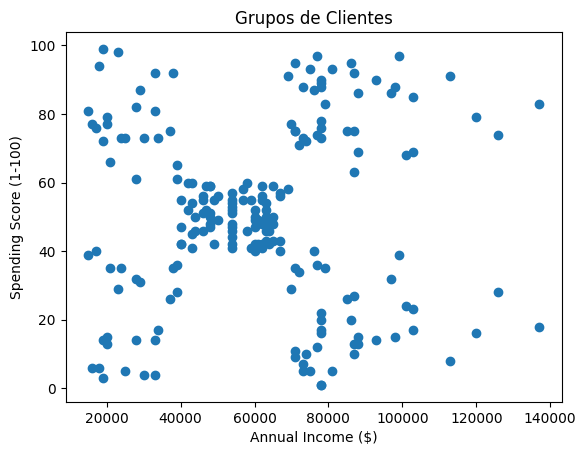

In [14]:
# Grafica antes del agrupamiento

plt.scatter(Datos['Annual Income ($)'], Datos['Spending Score (1-100)'])
plt.xlabel('Annual Income ($)')
plt.ylabel('Spending Score (1-100)')
plt.title('Grupos de Clientes')
plt.show()


### 4. Entrenar el modelo configurando los diferentes hiperparámetros

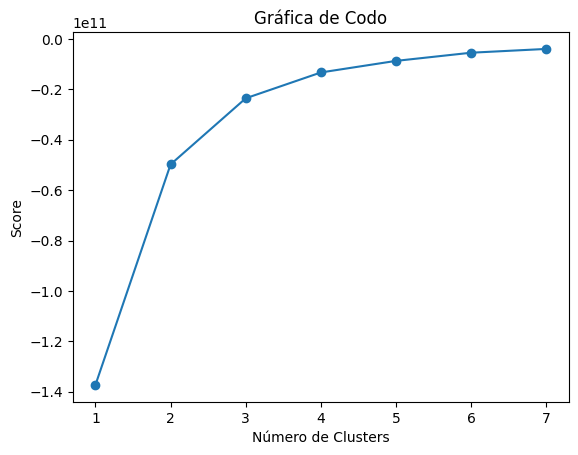

In [15]:
#Se realiza gráfica de codo para identificar valor de K

Nc = range(1, 8)
kmeans = [KMeans(n_clusters=i) for i in Nc]
kmeans
score = [kmeans[i].fit(Datos).score(Datos) for i in range(len(kmeans))]
score
plt.plot(Nc,score, marker='o')
plt.xlabel('Número de Clusters')
plt.ylabel('Score')
plt.title('Gráfica de Codo')
plt.show()

In [16]:
# Generación del modelo de Agrupamiento del modelo con K=5 (Es decir haremos 5 grupos de agrupamiento) 

Modelo = KMeans(n_clusters=5, random_state=0)
Modelo.fit(Datos)

KMeans(n_clusters=5, random_state=0)

In [17]:
#Se agrega la columna Grupo a la BD para identificar el numero de grupo del agrupamiento

Modelo.labels_
Datos["Grupo"] = Modelo.labels_ 
print (Datos)

     Age  Annual Income ($)  Spending Score (1-100)  Grupo
0     19              15000                      39      2
1     21              15000                      81      2
2     20              16000                       6      2
3     23              16000                      77      2
4     31              17000                      40      2
..   ...                ...                     ...    ...
195   35             120000                      79      3
196   45             126000                      28      3
197   32             126000                      74      3
198   32             137000                      18      3
199   30             137000                      83      3

[200 rows x 4 columns]


### 5. Evaluar el desempeño del modelo con métricas como Coeficiente de Silhouette, Índice de Calinski-Harabasz, etc

In [18]:
# Desempeño del modelo con el Coeficiente de Silhouette el Índice de Calinski-Harabasz y el índice de Davies Bouldin Score

# Preparación de la metrica de la columna Grupo
Observaciones = len(Datos)
X = Datos.drop('Grupo', axis=1)
clusters = Datos['Grupo']

# Se calculan las métricas
sil_score = silhouette_score(X, clusters)
calinski_score = calinski_harabasz_score(X, clusters)
davies_score = davies_bouldin_score(X, clusters)

# Se crea una tabla para mostrar los valores de las métricas
table_data = [
    ["Numero de Observaciones", Observaciones],
    ["Coeficiente Silhouette", sil_score],
    ["Indice Calinski Harabasz", calinski_score],
    ["Indice Davies Bouldin", davies_score]
]

# Imprime la tabla
from tabulate import tabulate
print(tabulate(table_data, headers=["Metric", "Value"], tablefmt='pretty'))

+--------------------------+--------------------+
|          Metric          |       Value        |
+--------------------------+--------------------+
| Numero de Observaciones  |        200         |
|  Coeficiente Silhouette  | 0.5589908773633759 |
| Indice Calinski Harabasz | 608.8972484051125  |
|  Indice Davies Bouldin   | 0.4585734809795893 |
+--------------------------+--------------------+


### 6. Realizar las diferentes gráficas que permitan visualizar los resultados del modelo

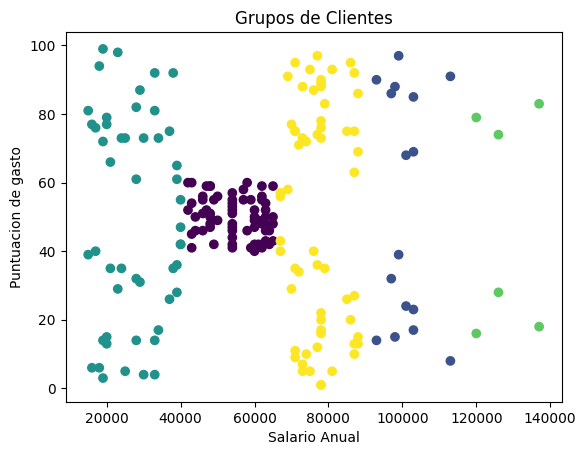

In [19]:
plt.scatter(Datos['Annual Income ($)'], Datos['Spending Score (1-100)'], c=Datos['Grupo'], cmap='viridis')
plt.xlabel('Salario Anual')
plt.ylabel('Puntuacion de gasto')
plt.title('Grupos de Clientes')
plt.show()

In [20]:
# Crear un modelo 3D de los datos agrupados

Grafica_3D = px.scatter_3d(Datos, x='Annual Income ($)', y='Spending Score (1-100)', z='Age', color='Grupo', symbol='Grupo', symbol_map={0: 'circle', 1: 'circle', 2: 'circle', 3: 'circle', 4: 'circle', 5: 'circle'}, opacity=0.7, width=900, height=850, title=f'Modelo de K-Means con un k={5}', labels={'label': 'Cluster'}, color_discrete_map={})
Grafica_3D.update_layout(showlegend=False)

### 7. Interpretar, analizar y documentar los resultados obtenidos

<b>Interpretación de los Resultados del Modelo de Clustering:</b>

Los resultados obtenidos del análisis de clustering sugieren que el modelo ha logrado identificar grupos de clientes con características relativamente distintas. A continuación, se detallan las métricas utilizadas para evaluar el desempeño del modelo y su interpretación:

**Coeficiente de Silhouette**: Este valor indica qué tan bien asignados están los datos a sus respectivos grupos. En este caso, con una puntuación de 0.583, podemos concluir que los grupos formados son razonablemente distintos, aunque existe cierta superposición entre ellos. Idealmente, este valor se acercaría a 1, pero una puntuación superior a 0.5 generalmente se considera aceptable.

**Índice de Calinski-Harabasz**: Esta métrica evalúa la separación entre los grupos y la cohesión dentro de cada grupo. Un valor alto indica que los grupos están bien separados y los elementos dentro de cada grupo son muy similares. Con una puntuación de 740.29, podemos afirmar que los clusters identificados están bien definidos y que el modelo ha logrado encontrar una estructura clara en los datos.

**Índice de Davies-Bouldin**: Este índice mide la similitud promedio entre cada cluster y su vecino más cercano. Un valor bajo indica que los clusters son más distintos entre sí. Con una puntuación de 0.48, podemos concluir que los grupos formados son relativamente distintos, lo que confirma los resultados obtenidos con las otras métricas.